In [25]:
%load_ext autoreload
%autoreload 2

#%pylab notebook
%matplotlib inline
from pylab import *
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams["figure.facecolor"] = 'white'
try:
    import os
    rc('text.latex',preamble=r'\usepackage{/Users/sraghunathan/.configs/apjfonts}')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
rcParams['figure.dpi'] = 150

In [27]:
import sys, numpy as np, scipy as sc, warnings, os, healpy as H
sys.path.append('/Users/sraghunathan/Research/SPTPol/analysis/git/DRAFT/modules/')
import foregrounds as fg, misc

#import matplotlib.cbook
warnings.filterwarnings('ignore',category=RuntimeWarning)
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings('ignore', category=matplotlib.cbook.mplDeprecation)

In [42]:
#params
TParr = ['T', 'P']
which_spec = 'TT'
#which_spec = 'EE'
#which_spec = 'BB'
#which_spec = 'TE'
#which_spec = 'EB'

param_dict = {}

#spt3g masks
nside, lmax = 2048, 6000
TParr = ['T', 'P']
data_folder = '/Volumes/data_PHD_WD_babbloo/pySM/yomori/galforegrounds/'
#param_dict['cl_gal_dic_dust_fname'] = '%s/spt3g/d1s1_combined/cls_galactic_sims_both_nside%s_lmax%s.npy' %(data_folder, nside, lmax)
param_dict['cl_gal_dic_dust_fname'] = '%s/spt3g/cls_galactic_sims_dust_nside%s_lmax%s.npy' %(data_folder, nside, lmax)
param_dict['cl_gal_dic_sync_fname'] = '%s/spt3g/cls_galactic_sims_sync_nside%s_lmax%s.npy' %(data_folder, nside, lmax)
extra_str = 'YOmori_pySM/spt3g/'

if (0):
    #S4 specs
    specs_dic = {
    #freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P] 
    #20: [10.0, None, None, None, None, None, None],
    #27: [7.4, 21.8, 471., 3.5, 30.8, 700, 1.4],
    #39: [5.1, 12.4, 428., 3.5, 17.6, 700, 1.4], 
    93: [2.2, 2.0, 2154., 3.5, 2.9, 700, 1.4],
    145: [1.4, 2.0, 4364., 3.5, 2.8, 700, 1.4],
    225: [1.0, 6.9, 7334., 3.5, 9.8, 700, 1.4],
    278: [0.9, 16.7, 7308., 3.5, 23.6, 700, 1.4],
    }
    freqarr = sorted( specs_dic.keys() )

param_dict['lmax'] = lmax
param_dict['Dlfile_len'] = '/Users/sraghunathan/Research/SPTPol/analysis/git/DRAFT/data/output_planck_r_0.0_2015_cosmo_lensedCls.dat'

In [43]:
if (0):
    #beam and noise arr
    beamarr = []
    noisearr_T, elkneearr_T, alphakneearr_T = [], [], []
    noisearr_P, elkneearr_P, alphakneearr_P = [], [], []
    for freq in freqarr:
        beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P = specs_dic[freq]
        beamarr.append(beam_arcmins)
        noisearr_T.append(white_noise_T)
        noisearr_P.append(whitenoise_P)
        elkneearr_T.append(elknee_T)
        elkneearr_P.append(elknee_P)
        alphakneearr_T.append(alphaknee_T)
        alphakneearr_P.append(alphaknee_P)    

    print(elkneearr_T)

In [44]:
if (0):
    #collect beam and noise into a dic; elknee and alpha into a dic
    beam_noise_dic = {}
    elknee_dic = {}
    for TP in TParr:
        beam_noise_dic[TP] = {}
        elknee_dic[TP] = {} 
        if TP == 'T':
            freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_T, elkneearr_T, alphakneearr_T
        elif TP == 'P':
            freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_P, elkneearr_P, alphakneearr_P

        for (freq, beam, noise, elknee, alphaknee) in zip(freqarr, beamarr, noisearr, elkneearr, alphakneearr):
            beam_noise_dic[TP][freq] = [beam, noise]
            elknee_dic[TP][freq] = [elknee, alphaknee]

In [45]:
if (0):
    #collect beam and noise into a dic; elknee and alpha into a dic
    beam_noise_dic = {}
    elknee_dic = {}
    for TP in TParr:
        beam_noise_dic[TP] = {}
        elknee_dic[TP] = {} 
        if TP == 'T':
            freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_T, elkneearr_T, alphakneearr_T
        elif TP == 'P':
            freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_P, elkneearr_P, alphakneearr_P

        for (freq, beam, noise, elknee, alphaknee) in zip(freqarr, beamarr, noisearr, elkneearr, alphakneearr):
            beam_noise_dic[TP][freq] = [beam, noise]
            elknee_dic[TP][freq] = [elknee, alphaknee]

In [46]:
if (0):
    #get beams
    bl_dic = misc.get_beam_dic(freqarr, beam_noise_dic['T'], param_dict['lmax'])
    print(bl_dic.keys())
    if (1):
        for freq in freqarr:
            plot(bl_dic[freq], label = freq)
        legend(loc = 1)

In [47]:
#CAMB output for plotting
camb_file = param_dict['Dlfile_len']
Tcmb = 2.725
el_camb = np.loadtxt(camb_file, usecols = [0])
dl_camb = np.loadtxt(camb_file, usecols = [1,2,3,4])

cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 900x600 with 0 Axes>

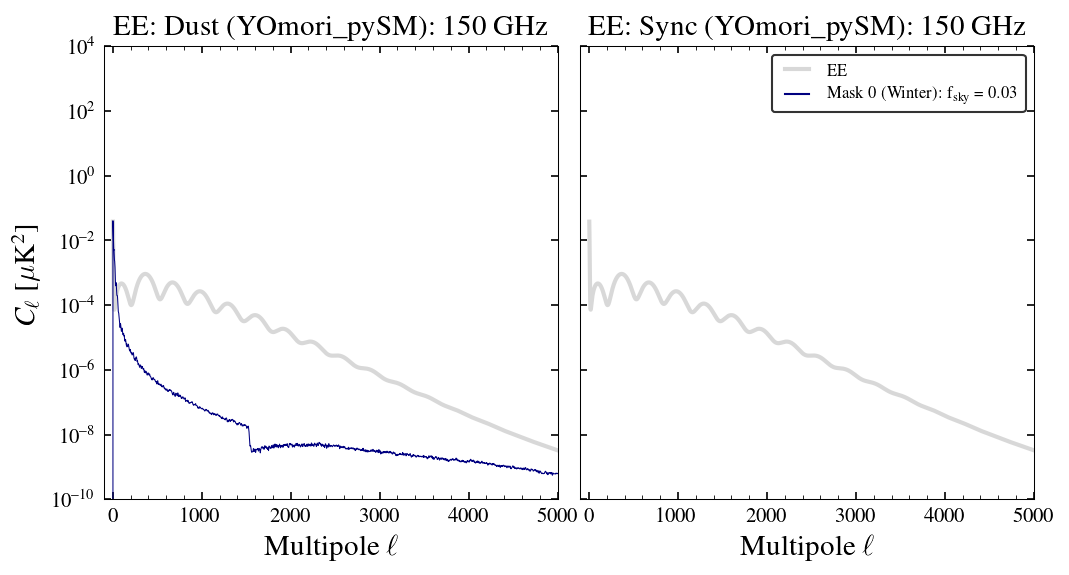

SystemExit: 

In [48]:
mask_str_dic = None
clf()
fig = figure(figsize=(8., 4.))
subplots_adjust(wspace=0.05)
freqarr = [93, 143] ##278]
#alpha_dic = {93: 0.3, 145: 0.6, 225: 0.8, 278: 1.}
alpha_dic = {93: .5, 143: 1., 145: 1., 150: 1., 225: 1., 278: 1.}
lw_dic = {93: 1., 143: 1., 145: 1., 150: 1., 225: 1.5, 278: 2.}
ls_dic = {93: '-.', 143: '-', 145: '-', 150: '-', 225: '--', 278: ':'}

tot_mask_iter = 4
color_dic = {0:'navy', 1: 'green', 2: 'goldenrod', 3: 'darkred'}

tot_mask_iter = 5
color_dic = {0:'navy', 1: 'green', 2: 'goldenrod', 3: 'orangered', 4: 'darkred'}

tot_mask_iter = 4
color_dic = {0:'navy', 1: 'green', 2: 'goldenrod', 3: 'darkred'}
reqd_masks = []
if extra_str.find('s4like_mask_v2')>-1:
    tot_mask_iter = 6
    reqd_masks = [0, 1, 2, 3, 4, 5]
    #color_dic = {0:'navy', 1: 'darkblue', 2: 'royalblue', 3: 'orangered', 4: 'darkred', 5: 'maroon'}
    cmap = cm.jet
    color_dic = {0:cmap(0), 1: cmap(15), 2: cmap(30), 3: cmap(230), 4: cmap(240), 5: cmap(255)}
    freqarr = [145]
    which_spec = 'TT'
if extra_str.find('spt3g')>-1:
    tot_mask_iter = 1 #4
    reqd_masks = [0]#, 1, 2, 3]
    #color_dic = {0:'navy', 1: 'darkblue', 2: 'royalblue', 3: 'orangered', 4: 'darkred', 5: 'maroon'}
    cmap = cm.jet
    color_dic = {0: 'navy', 1: 'darkred', 2: 'darkgreen', 3: 'goldenrod'}
    mask_str_dic = {0: 'Winter', 1: 'Summer: el1c-el2c', 2: 'Summer: el1b-el2b', 3: 'Summer: el1-el5'}
    freqarr = [150]
    which_spec = 'EE'#EE' #EE' #'TT'


#xscale_val = 'log' ##None#'log' #None
xscale_val = None
for mask_iter in range(tot_mask_iter):
    if len(reqd_masks)>0:
        if mask_iter not in reqd_masks: continue
    plot_done = []
    for freq1 in freqarr:
        for freq2 in freqarr:
            

            if (freq1, freq2) in plot_done: continue
                
            if freq1 != freq2: continue
                
            try:
                el, cl_dust = fg.get_cl_galactic(param_dict, 'dust', freq1, freq2, which_spec = which_spec, which_gal_mask = mask_iter)
            except:
                cl_dust = None  
                
            try:
                el, cl_sync = fg.get_cl_galactic(param_dict, 'sync', freq1, freq2, which_spec = which_spec, which_gal_mask = mask_iter)
            except:
                cl_sync = None
                
            if freq1 == 93:
                delta_ell = 50
            elif freq1 == 145 or freq1 == 150:
                delta_ell = 100                         
            el_to_plot = np.arange(min(el), max(el)+1, delta_ell)

            plot_done.append((freq1, freq2))
            lab = '%s: (%s,%s)' %(mask_iter, freq1, freq2)

            lwval = lw_dic[freq1]
            colorval = color_dic[mask_iter]
            alphaval = alpha_dic[freq1]
            lsval = ls_dic[freq1]
            #lwval = 1.
            lab = None
            if cl_dust is not None:
                cl_dust_to_plot = np.interp(el_to_plot, el, cl_dust)
                ax = subplot(1,2,1, yscale = 'log', xscale=xscale_val)
                plot(el, cl_dust, label = lab, lw = 0.5, linestyle = lsval, color = colorval, alpha = alphaval)
                #plot(el_to_plot, cl_dust_to_plot, label = lab, lw = lwval, linestyle = lsval, color = colorval, alpha = alphaval)
            if cl_sync is not None:
                cl_sync_to_plot = np.interp(el_to_plot, el, cl_sync)                            
                ax = subplot(1,2,2, yscale = 'log', xscale=xscale_val)
                plot(el, cl_sync, label = lab, lw = 0.5, linestyle = lsval, color = colorval, alpha = alphaval)
                #plot(el_to_plot, cl_sync_to_plot, label = lab, lw = lwval, linestyle = lsval, color = colorval, alpha = alphaval)

for cntr, which_comp in enumerate( ['dust', 'sync'] ):
    
    ax = subplot(1,2,cntr+1, yscale = 'log', xscale=xscale_val)
    if which_spec == 'TT':
        plot(el_camb, cl_TT, 'gray', lw = 2., label = r'%s' %(which_spec), alpha = 0.3, zorder = -1000.)
    elif which_spec == 'EE':
        plot(el_camb, cl_EE, 'gray', lw = 2., label = r'%s' %(which_spec), alpha = 0.3, zorder = -1000.)
    elif which_spec == 'TE':
        plot(el_camb, cl_TE, 'gray', lw = 2., label = r'%s' %(which_spec), alpha = 0.3, zorder = -1000.)
        plot(el_camb, abs( cl_TE ), 'gray', ls = '--', lw = 2., alpha = 0.3, zorder = -1000.)        
    elif which_spec == 'BB':
        plot(el_camb, cl_BB, 'gray', lw = 2., label = r'%s' %(which_spec), alpha = 0.3, zorder = -1000.)
    if cntr == 1: ##0:

        galdustsims_cl = np.load(param_dict['cl_gal_dic_dust_fname'], allow_pickle=1, encoding = 'latin1').item()
        fsky_arr = galdustsims_cl['fsky_arr']
        if len(freqarr)>1:
            for freq1 in absfreqarr:
                plot([], [], color = 'k', alpha = alpha_dic[freq1], ls = ls_dic[freq1], label = r'%s GHz' %(freq1))
        for mask_iter in range(tot_mask_iter):
            if len(reqd_masks)>0:
                if mask_iter not in reqd_masks: continue
            fsky_val = fsky_arr[mask_iter]
            labval = r'Mask %s: f$_{\rm sky} = %.2f$' %(mask_iter, fsky_val)
            if mask_str_dic is not None:
                labval = r'Mask %s (%s): f$_{\rm sky} = %.2f$' %(mask_iter, mask_str_dic[mask_iter], fsky_val)
            plot([], [], color = color_dic[mask_iter], label = labval)
            
        #legend(loc = 3, ncol = 2, fontsize = 8)
        legend(loc = 1, ncol = 1, fontsize = 8)
    xlabel(r'Multipole $\ell$', fontsize = 14)
    if cntr == 0:
        ylabel(r'$C_{\ell}\ [\mu {\rm K}^{2}]$', fontsize = 14)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    extra_str_tmp = extra_str.split('/')[0].replace('_', '\_')
    if len(freqarr)>1:
        title(r'%s: %s (%s)' %(which_spec, which_comp.capitalize(), extra_str_tmp), fontsize = 14)
    else:
        title(r'%s: %s (%s): %s GHz' %(which_spec, which_comp.capitalize(), extra_str_tmp, freqarr[0]), fontsize = 14)
    xmax = 5000#7100 #lmax+100
    xlim(-100, xmax); 
    ylim(1e-10, 1e4)

    #xlim(None, 200); ylim(1e-6, 1e-2)
    
show();sys.exit()
plfolder = 'reports/galactic_sims/dust_sync_spectra/%s/' %(extra_str)
os.system('mkdir -p %s' %(plfolder))
#savefig('%s/dust_sync_%s.pdf' %(plfolder, which_spec))

In [50]:
#comparing pysm3 d0 vs pysm d0 from Yomori
fd_AZ_d0 = '/Volumes/data_PHD_WD_babbloo/s4/cmbs4/map_based_simulations/202002_foregrounds_extragalactic_cmb_tophat/4096/'
f_AZ_d0 = '%s/dust/0000/spt3g/cls_galactic_sims_dust_nside%s_lmax%s.npy' %(fd_AZ_d0, nside, lmax)

fd_YO_d0 = '/Volumes/data_PHD_WD_babbloo/pySM/yomori/galforegrounds/'
f_YO_d0 = '%s/spt3g/cls_galactic_sims_dust_nside%s_lmax%s.npy' %(fd_YO_d0, nside, lmax)


In [81]:
which_gal_mask = 0
f_AZ_d0_dic = np.load(f_AZ_d0, allow_pickle = 1, encoding = 'latin1').item()['cl_dic'][which_gal_mask]
f_YO_d0_dic = np.load(f_YO_d0, allow_pickle = 1, encoding = 'latin1').item()['cl_dic'][which_gal_mask]

dict_keys([(93, 145), (93, 93), (145, 225), (225, 225), (93, 225), (145, 145)])


SystemExit: 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 900x600 with 0 Axes>

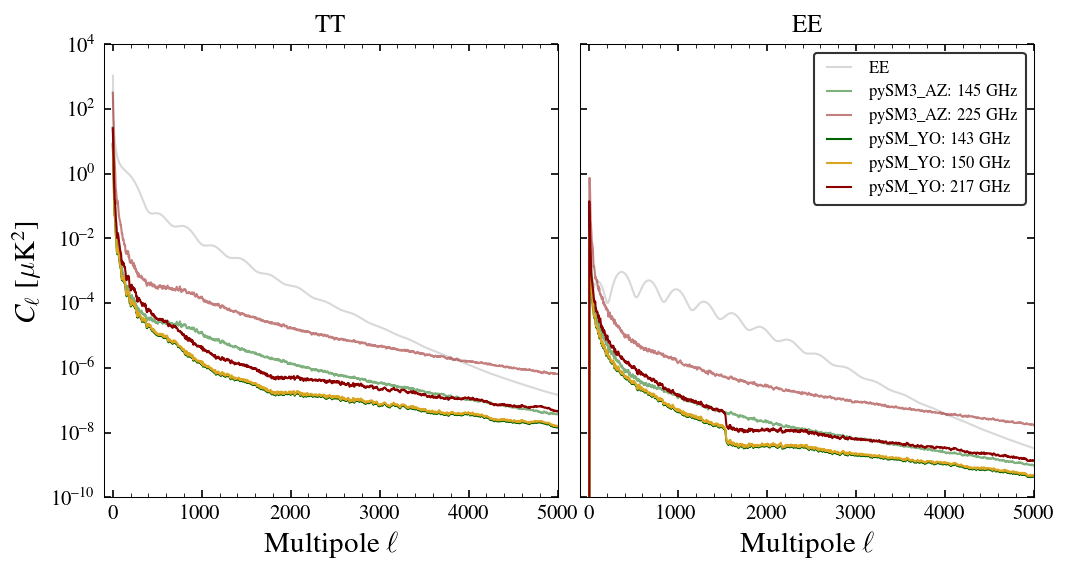

In [88]:
clf()
fig = figure(figsize=(8., 4.))
subplots_adjust(wspace=0.05)
which_spec_arr = ['TT', 'EE']
f_AZ_arr, f_YO_arr = [145, 225], [143, 150, 217]

for which_spec_cntr, which_spec in enumerate( which_spec_arr ):
    ax = subplot(1,2, which_spec_cntr+1, yscale = 'log')
    if which_spec == 'TT':
        plot(el_camb, cl_TT, 'gray', lw = 1., label = r'%s' %(which_spec), alpha = 0.3, zorder = -1000.)
        titstr = r'TT'
    elif which_spec == 'EE':
        plot(el_camb, cl_EE, 'gray', lw = 1., label = r'%s' %(which_spec), alpha = 0.3, zorder = -1000.)
        titstr = r'EE'
    colorarr = ['darkgreen', 'darkred']
    for f_az_cntr, f_AZ in enumerate( f_AZ_arr ):
        labval_AZ = r'pySM3\_AZ: %s GHz' %(f_AZ)
        plot(f_AZ_d0_dic[(f_AZ,f_AZ)][which_spec_cntr], color = colorarr[f_az_cntr], label = labval_AZ, lw = 1., alpha = 0.5)
    colorarr = ['darkgreen', 'goldenrod', 'darkred']
    for f_yo_cntr, f_YO in enumerate( f_YO_arr ):
        labval_YO = r'pySM\_YO: %s GHz' %(f_YO)
        plot(f_YO_d0_dic[(f_YO,f_YO)][which_spec_cntr], color = colorarr[f_yo_cntr], label = labval_YO, lw = 1.)
    title(titstr)
    if which_spec_cntr == 1:
        legend(loc = 1, fontsize = 8)

    xmax = 5000#7100 #lmax+100
    xlim(-100, xmax); 
    ylim(1e-10, 1e4)
    xlabel(r'Multipole $\ell$', fontsize = 14)
    if which_spec_cntr == 0:
        ylabel(r'$C_{\ell}\ [\mu {\rm K}^{2}]$', fontsize = 14)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    